In [1]:
import pandas as pd
import pydicom
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os
import fnmatch
from tqdm import tqdm
%matplotlib inline

In [2]:
df = pd.read_csv('./SIIM/train-rle.csv', index_col=0)
df.columns = ['EncodedPixels']

In [3]:
matches = []
for root, _, filenames in os.walk('./SIIM/dicom-images-train/'):
    for filename in fnmatch.filter(filenames, '*.dcm'):
        matches.append(os.path.join(root, filename))

In [4]:
example = pydicom.dcmread(matches[0])
example

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.11610.1517875233.906872
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: '988661e3-c606-4fdc-83a4-efad515fba91'
(0010, 0020) Patient ID                          LO: '988661e3-c606-4fdc-83a4-efad515fba91'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'M'
(0010, 1010) Patient'

In [5]:
# Setup a plot such that only the bottom spine is shown
def setup(ax):
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)

In [6]:
sex = []
age = []
modality = set()
dimensionality = set()
for match in tqdm(matches):
    example = pydicom.dcmread(match)
    sex.append(example[0x10, 0x40].value)
    age.append(example[0x10, 0x1010].value)
    modality.add(example[0x8, 0x60].value)
    dimensionality.add(example.pixel_array.shape)

  4%|▍         | 519/12089 [00:04<01:33, 124.12it/s]


KeyboardInterrupt: 

In [6]:
print(modality)
print(dimensionality)

NameError: name 'modality' is not defined

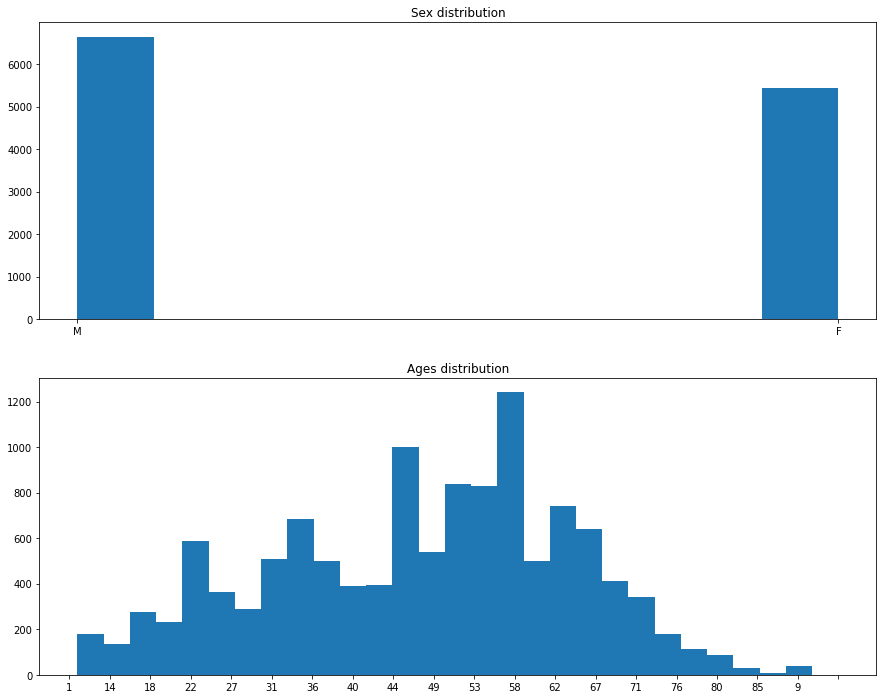

In [46]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))
ax[0].set_title('Sex distribution')
ax[0].hist(sex);
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[1].set_title('Ages distribution')
ax[1].hist(x=sorted(age), bins=np.linspace(1, 95, 30), );

In [21]:
######
min(age)

'1'

In [22]:
max(age)

'94'

In [ ]:
plt.hist()

In [11]:
df.index.value_counts()

1.2.276.0.7230010.3.1.4.8323329.1851.1517875169.919023     10
1.2.276.0.7230010.3.1.4.8323329.13026.1517875243.170116     8
1.2.276.0.7230010.3.1.4.8323329.5073.1517875186.287848      8
1.2.276.0.7230010.3.1.4.8323329.497.1517875163.185132       7
1.2.276.0.7230010.3.1.4.8323329.2878.1517875175.188420      6
1.2.276.0.7230010.3.1.4.8323329.2166.1517875171.437026      6
1.2.276.0.7230010.3.1.4.8323329.4703.1517875184.225849      6
1.2.276.0.7230010.3.1.4.8323329.11662.1517875234.206066     5
1.2.276.0.7230010.3.1.4.8323329.10779.1517875225.609424     5
1.2.276.0.7230010.3.1.4.8323329.13103.1517875243.616586     5
1.2.276.0.7230010.3.1.4.8323329.5474.1517875188.361438      5
1.2.276.0.7230010.3.1.4.8323329.3316.1517875177.224443      5
1.2.276.0.7230010.3.1.4.8323329.3875.1517875179.932640      5
1.2.276.0.7230010.3.1.4.8323329.11990.1517875236.793020     5
1.2.276.0.7230010.3.1.4.8323329.32158.1517875158.747814     5
1.2.276.0.7230010.3.1.4.8323329.551.1517875163.393692       5
1.2.276.

In [25]:
for match in matches:
    if '1.2.276.0.7230010.3.1.4.8323329.11459.1517875233.42491' == match.split('/')[-1][:-4]:
        filename = match

In [26]:
print(filename)

./SIIM/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.11459.1517875233.42490/1.2.276.0.7230010.3.1.3.8323329.11459.1517875233.42489/1.2.276.0.7230010.3.1.4.8323329.11459.1517875233.42491.dcm


In [5]:
filename = './SIIM/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.1851.1517875169.919022/1.2.276.0.7230010.3.1.3.8323329.1851.1517875169.919021/1.2.276.0.7230010.3.1.4.8323329.1851.1517875169.919023.dcm'

In [6]:
filename

'./SIIM/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.1851.1517875169.919022/1.2.276.0.7230010.3.1.3.8323329.1851.1517875169.919021/1.2.276.0.7230010.3.1.4.8323329.1851.1517875169.919023.dcm'

In [7]:
len(df.loc['1.2.276.0.7230010.3.1.4.8323329.1851.1517875169.919023', :])

10

In [6]:
from utils import rle2mask, plots, init_img_mask
import pandas as pd
import pydicom
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os
import fnmatch
from tqdm import tqdm
%matplotlib inline

In [8]:
filename = './SIIM/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.1851.1517875169.919022/1.2.276.0.7230010.3.1.3.8323329.1851.1517875169.919021/1.2.276.0.7230010.3.1.4.8323329.1851.1517875169.919023.dcm'

In [9]:
zero_mask = np.zeros((1024, 1024))

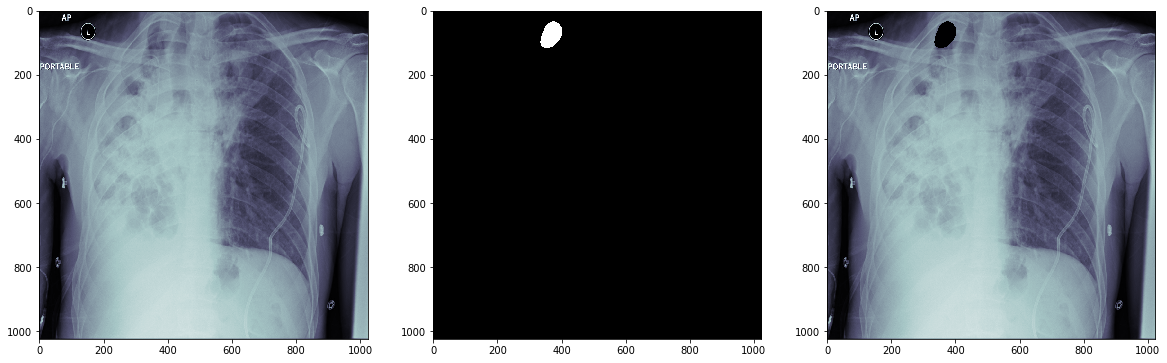

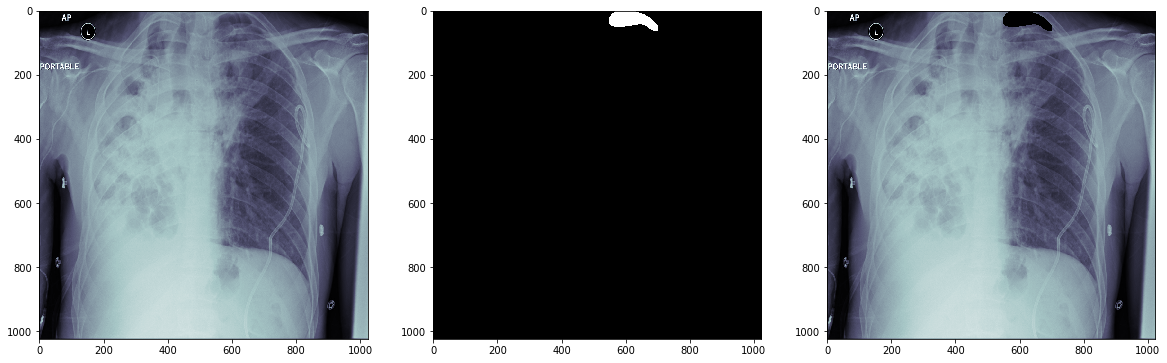

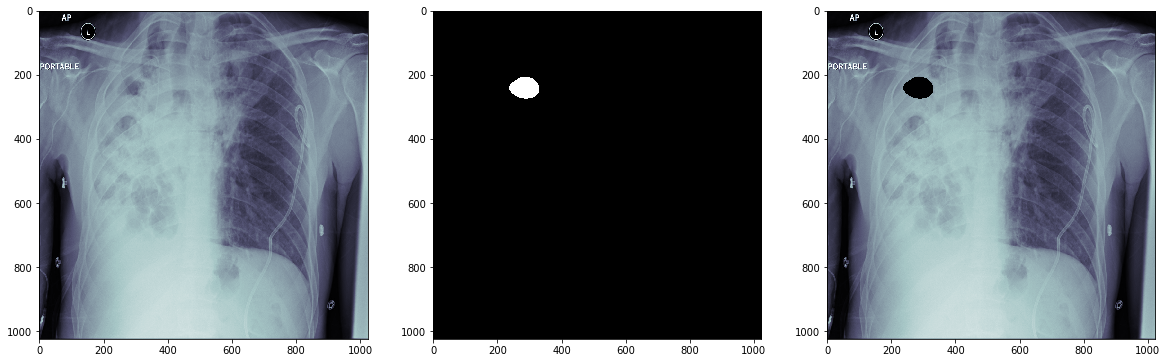

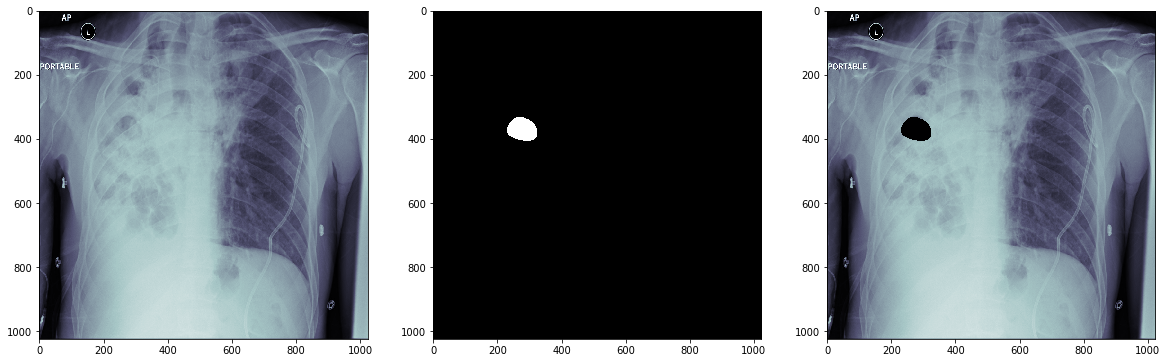

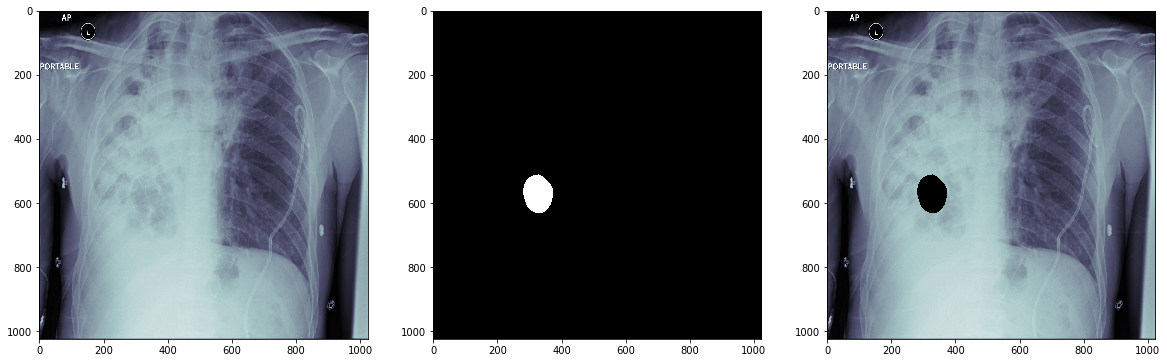

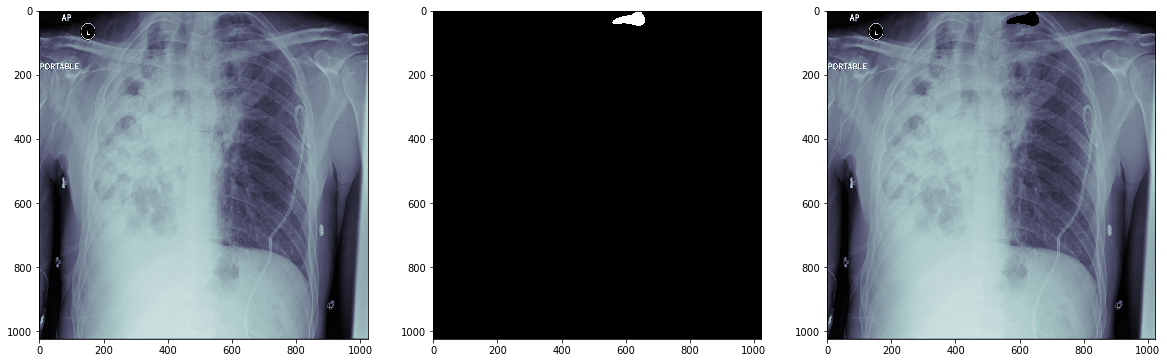

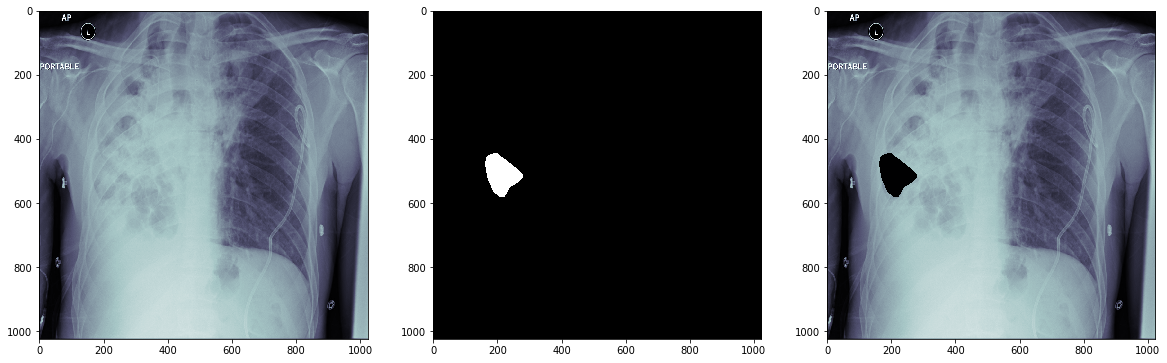

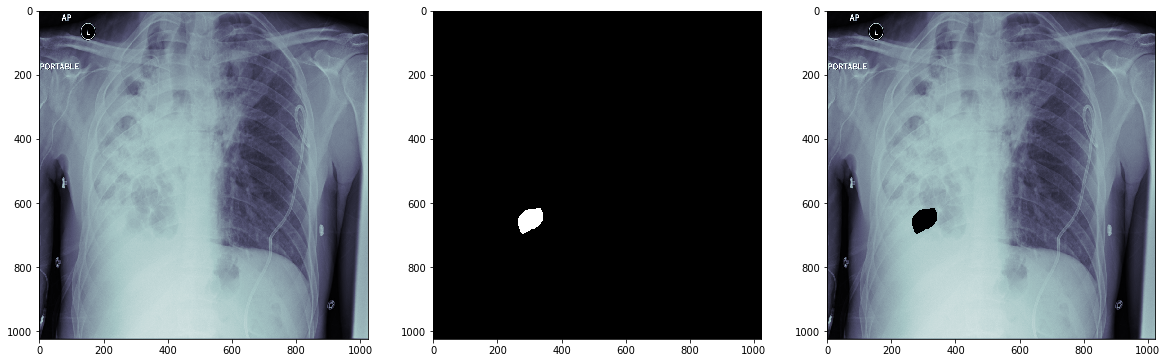

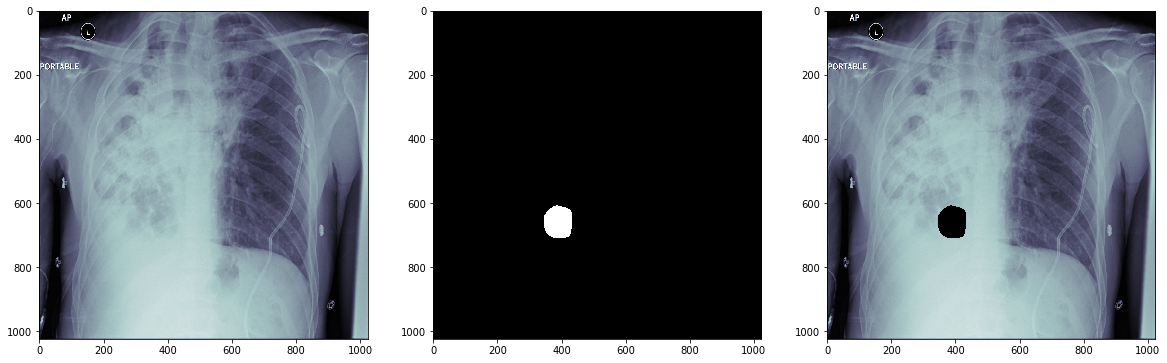

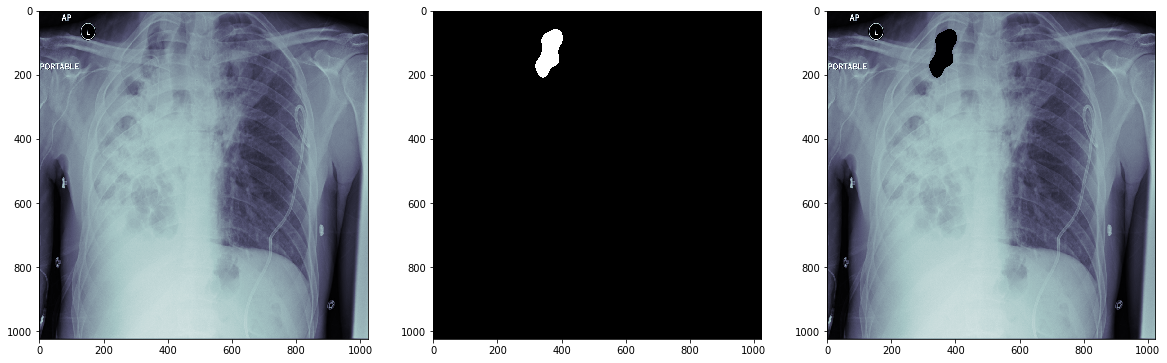

In [10]:
for i in range(0, len(df.loc[filename.split('/')[-1][:-4], :])):
    plots(init_img_mask(file_path=filename, csv_path='./SIIM/train-rle.csv', mask_id=i))
    zero_mask[np.where(init_img_mask(file_path=filename, csv_path='./SIIM/train-rle.csv', mask_id=i)[1])] = 1

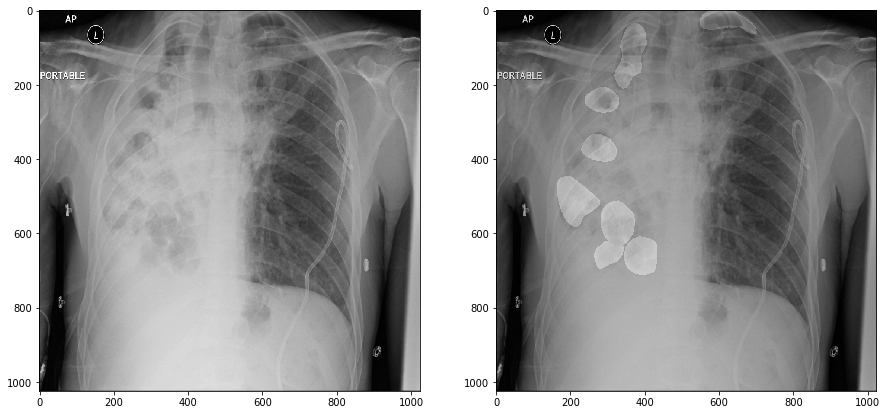

In [20]:
# fig, ax = plt.subplots(ncols=2, figsize=(15, 10))
# ax[0].imshow(pydicom.dcmread(filename).pixel_array, 'gray')
# ax[1].imshow(zero_mask, 'gray');
filename = './SIIM/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.1851.1517875169.919022/1.2.276.0.7230010.3.1.3.8323329.1851.1517875169.919021/1.2.276.0.7230010.3.1.4.8323329.1851.1517875169.919023.dcm'
fig, ax = plt.subplots(ncols=2, figsize=(15, 10))
ax[1].imshow(pydicom.dcmread(filename).pixel_array, 'gray')
ax[1].imshow(zero_mask, 'gray', alpha=0.15);
ax[0].imshow(pydicom.dcmread(filename).pixel_array, 'gray');

[0. 1.]
Sex M
Age 42


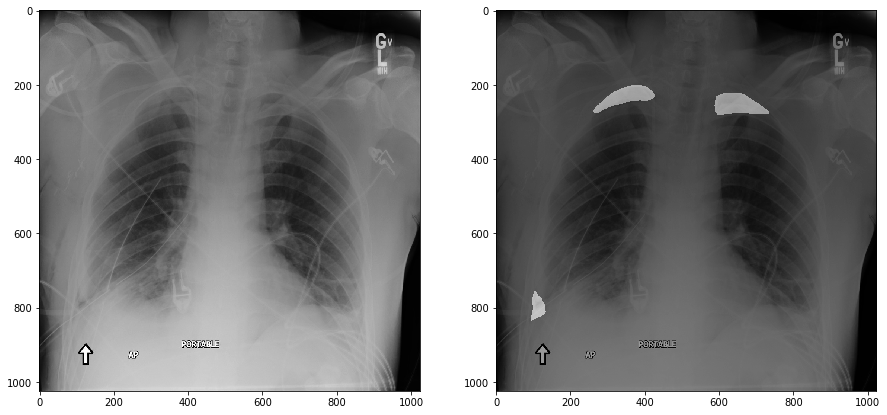

In [31]:
# fig, ax = plt.subplots(ncols=2, figsize=(15, 10))
# ax[0].imshow(pydicom.dcmread(filename).pixel_array, 'gray')
# ax[1].imshow(zero_mask, 'gray');
#filename = './SIIM/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.11277.1517875232.103157/1.2.276.0.7230010.3.1.3.8323329.11277.1517875232.103156/1.2.276.0.7230010.3.1.4.8323329.11277.1517875232.103158.dcm'
fig, ax = plt.subplots(ncols=2, figsize=(15, 10))
pydicomdict = pydicom.dcmread(filename)
mask = np.zeros((1024, 1024))
for i in range(len(df.loc[df.index=='1.2.276.0.7230010.3.1.4.8323329.11459.1517875233.42491'])):
    mask[np.where(init_img_mask(file_path=filename, csv_path='./SIIM/train-rle.csv', mask_id=i)[1])] = 1
print(np.unique(mask))
print('Sex', pydicomdict[0x10, 0x40].value)
print('Age', pydicomdict[0x10, 0x1010].value)
ax[1].imshow(pydicomdict.pixel_array, 'gray')
ax[1].imshow(mask, 'gray', alpha=0.4);
ax[0].imshow(pydicomdict.pixel_array, 'gray');

,EncodedPixels
ImageId,
1.2.276.0.7230010.3.1.4.8323329.11459.1517875233.42491,266511 1 1023 3 1018 7 1015 10 1013 12 1010 1...
1.2.276.0.7230010.3.1.4.8323329.11459.1517875233.42491,100104 12 1007 22 997 32 988 38 984 42 980 44...
1.2.276.0.7230010.3.1.4.8323329.11459.1517875233.42491,601344 3 1011 23 996 32 988 38 983 43 979 46 ...
1.2.276.0.7230010.3.1.4.8323329.11459.1517875233.42491,96062 6 1013 10 1010 14 1005 18 1001 23 997 2...
1.2.276.0.7230010.3.1.4.8323329.11459.1517875233.42491,271635 1 1022 1 1022 2 1021 3 1020 3 1021 2 1...


In [9]:
len(matches)

10712

In [10]:
df.shape

(11582, 1)

In [11]:
matches[0]

'./SIIM/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.11610.1517875233.906871/1.2.276.0.7230010.3.1.3.8323329.11610.1517875233.906870/1.2.276.0.7230010.3.1.4.8323329.11610.1517875233.906872.dcm'

In [12]:
from utils import rle2mask, plots, init_img_mask

In [13]:
df.columns

Index(['EncodedPixels'], dtype='object')

In [14]:
mask_values = []
outmask_values = []
for match in tqdm(matches):
    example = pydicom.dcmread(match)
    filename = match.split('/')[-1][:-4]
    pic = example.pixel_array
    for mask in range(len(df.loc[df.index==filename]['EncodedPixels'])):
        if (df.loc[df.index == filename]['EncodedPixels'].values[mask].strip() == str(-1)):
            break
        mask_out = rle2mask(df.loc[df.index == filename]['EncodedPixels'].values[mask][1:], 1024, 1024).T
        mask_values.append(np.mean(pic[np.where(mask_out)]))
        outmask_values.append(np.mean(pic[np.flip(np.where(mask_out), axis=1)]))
    del pic

100%|██████████| 10712/10712 [04:51<00:00, 36.81it/s]


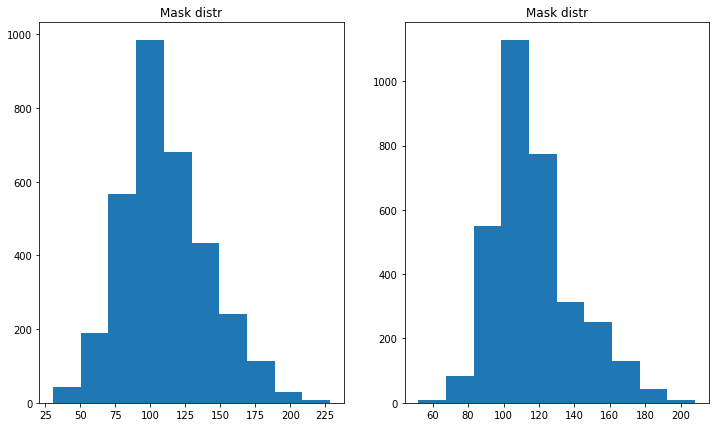

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))
ax[0].set_title('Mask distr')
ax[0].hist(mask_values)
ax[1].set_title('Mask distr')
ax[1].hist(outmask_values);

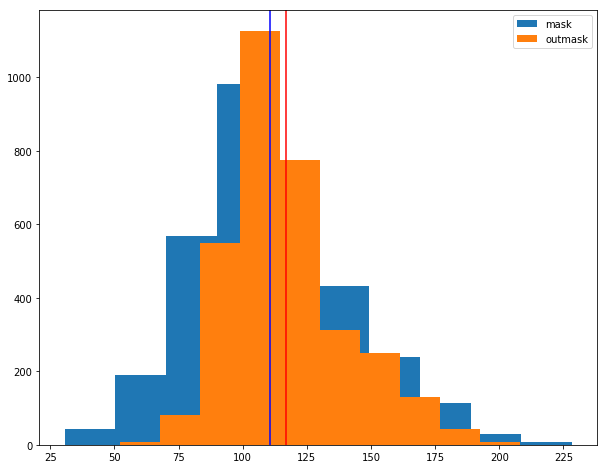

In [17]:
plt.figure(figsize=(10, 8))
plt.hist(mask_values, label='mask');
plt.hist(outmask_values, label='outmask');
plt.axvline(np.mean(mask_values), c='b')
plt.axvline(np.mean(outmask_values), c='r')
plt.legend();

In [17]:
from_folders = set([match.split('/')[-1][:-4] for match in matches])

In [18]:
from_csv = set(df.index.values)

In [19]:
len(from_folders)

10712

In [20]:
len(from_csv)

10675

In [21]:
len(from_folders) - len(from_csv)

37

In [24]:
set([folder for folder in from_folder if folder in from_csv]) == from_csv

True

In [38]:
submision_csv = pd.read_csv('./sample_submission.csv')

In [39]:
[coincide for coincide in from_csv if coincide in set(submision_csv.ImageId.values)]

[]

In [42]:
submision_csv.ImageId.value_counts()

1.2.276.0.7230010.3.1.4.8323329.6632.1517875199.314301    8
1.2.276.0.7230010.3.1.4.8323329.6776.1517875201.61444     6
1.2.276.0.7230010.3.1.4.8323329.6765.1517875200.31861     6
1.2.276.0.7230010.3.1.4.8323329.6151.1517875196.762570    5
1.2.276.0.7230010.3.1.4.8323329.6753.1517875199.978778    4
1.2.276.0.7230010.3.1.4.8323329.5879.1517875192.98770     4
1.2.276.0.7230010.3.1.4.8323329.6972.1517875202.174315    4
1.2.276.0.7230010.3.1.4.8323329.6109.1517875196.574624    3
1.2.276.0.7230010.3.1.4.8323329.6490.1517875198.551179    3
1.2.276.0.7230010.3.1.4.8323329.6409.1517875198.38966     3
1.2.276.0.7230010.3.1.4.8323329.5864.1517875191.874675    3
1.2.276.0.7230010.3.1.4.8323329.5995.1517875193.697651    3
1.2.276.0.7230010.3.1.4.8323329.6200.1517875196.988814    3
1.2.276.0.7230010.3.1.4.8323329.7041.1517875202.485810    3
1.2.276.0.7230010.3.1.4.8323329.606.1517875163.664448     3
1.2.276.0.7230010.3.1.4.8323329.6062.1517875195.751534    3
1.2.276.0.7230010.3.1.4.8323329.7019.151

In [66]:
folds = pd.read_csv('./SIIM/train.csv')

In [67]:
sum(folds.loc[folds['fold'] == 0, :][' EncodedPixels'].values == ' -1')

829

In [68]:
folds.loc[folds['fold'] == 0, :].shape

(1068, 4)

In [69]:
folds.label.value_counts()

0    8296
1    2379
Name: label, dtype: int64